Summary Statistics for Numerical Variables:
          instant     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std    210.877136    0.167266    0.465405    7.506729    8.150308   14.237589   
min      1.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%    183.250000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%    365.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%    547.750000    0.000000    1.000000   26.880615   30.445775   72.989575   
max    730.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt         day       month         year  
count  730.000000   730.000000  730.000000  730.000000   730.000000  
mean    12.763620  4508.006849   15.720548    6.526027  2018.500000  
std      5.19584

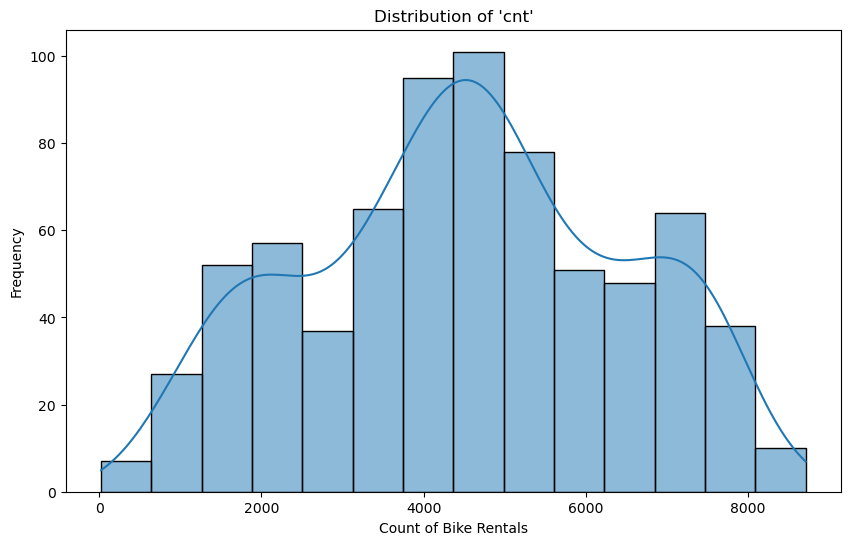

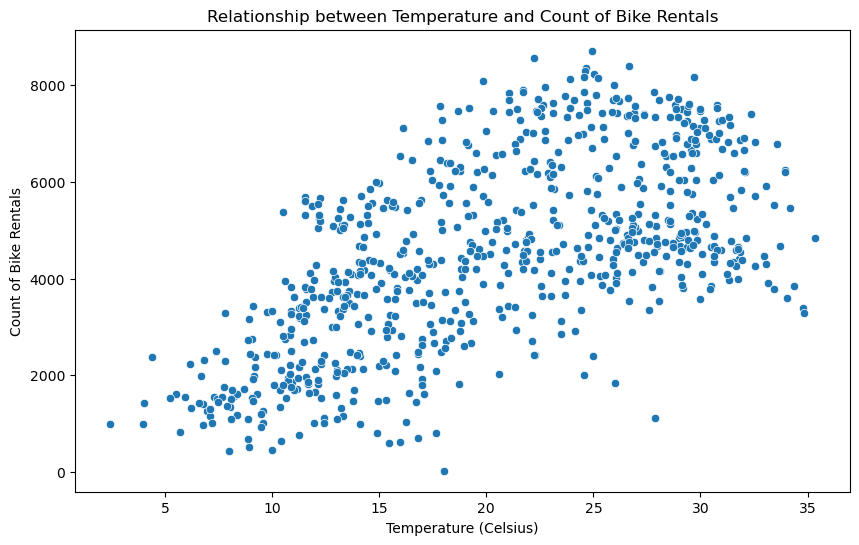

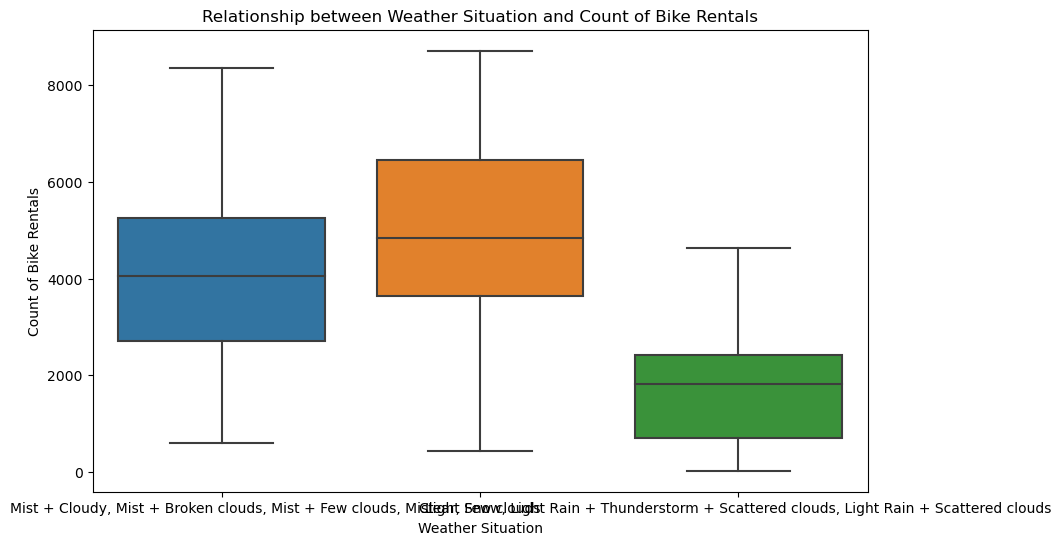

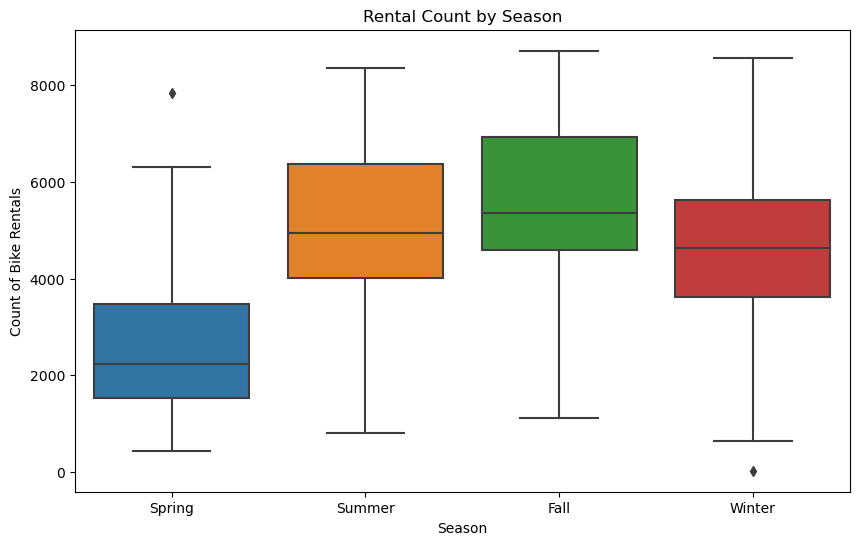

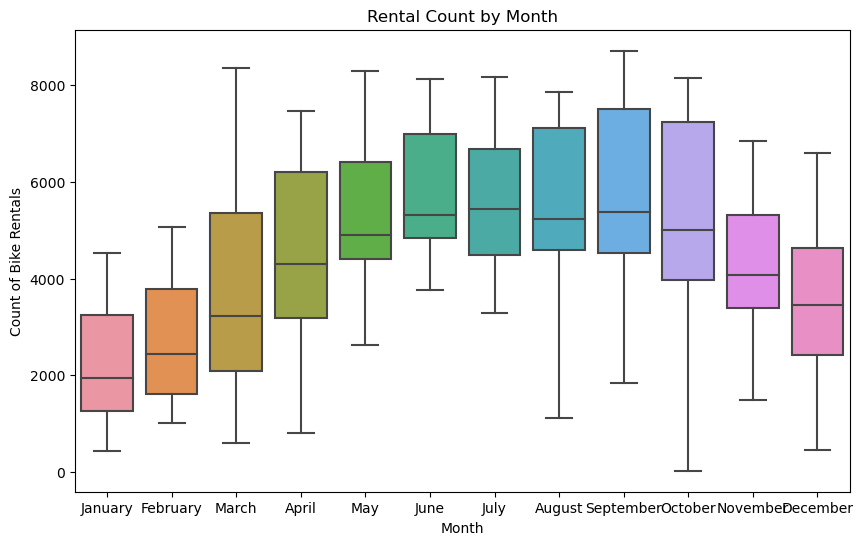

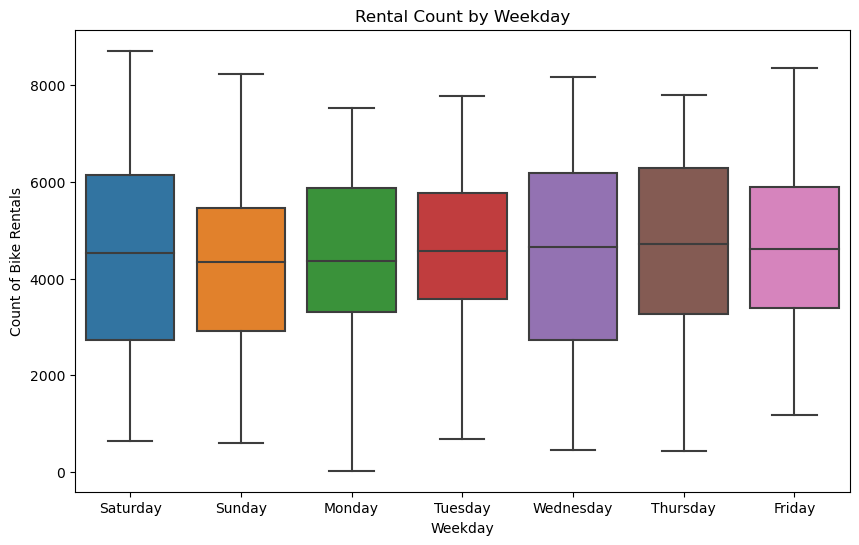

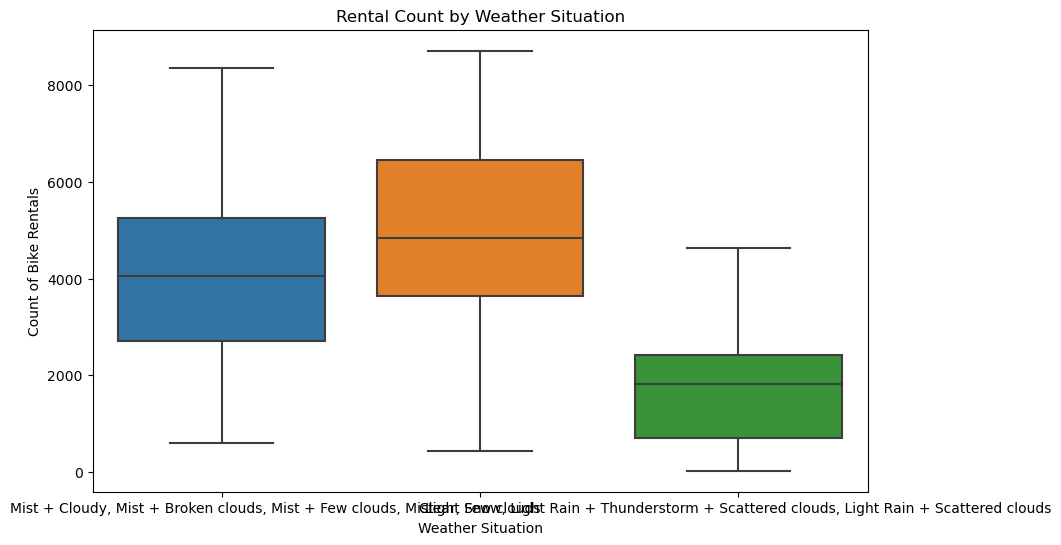

C:\Users\Priyanka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


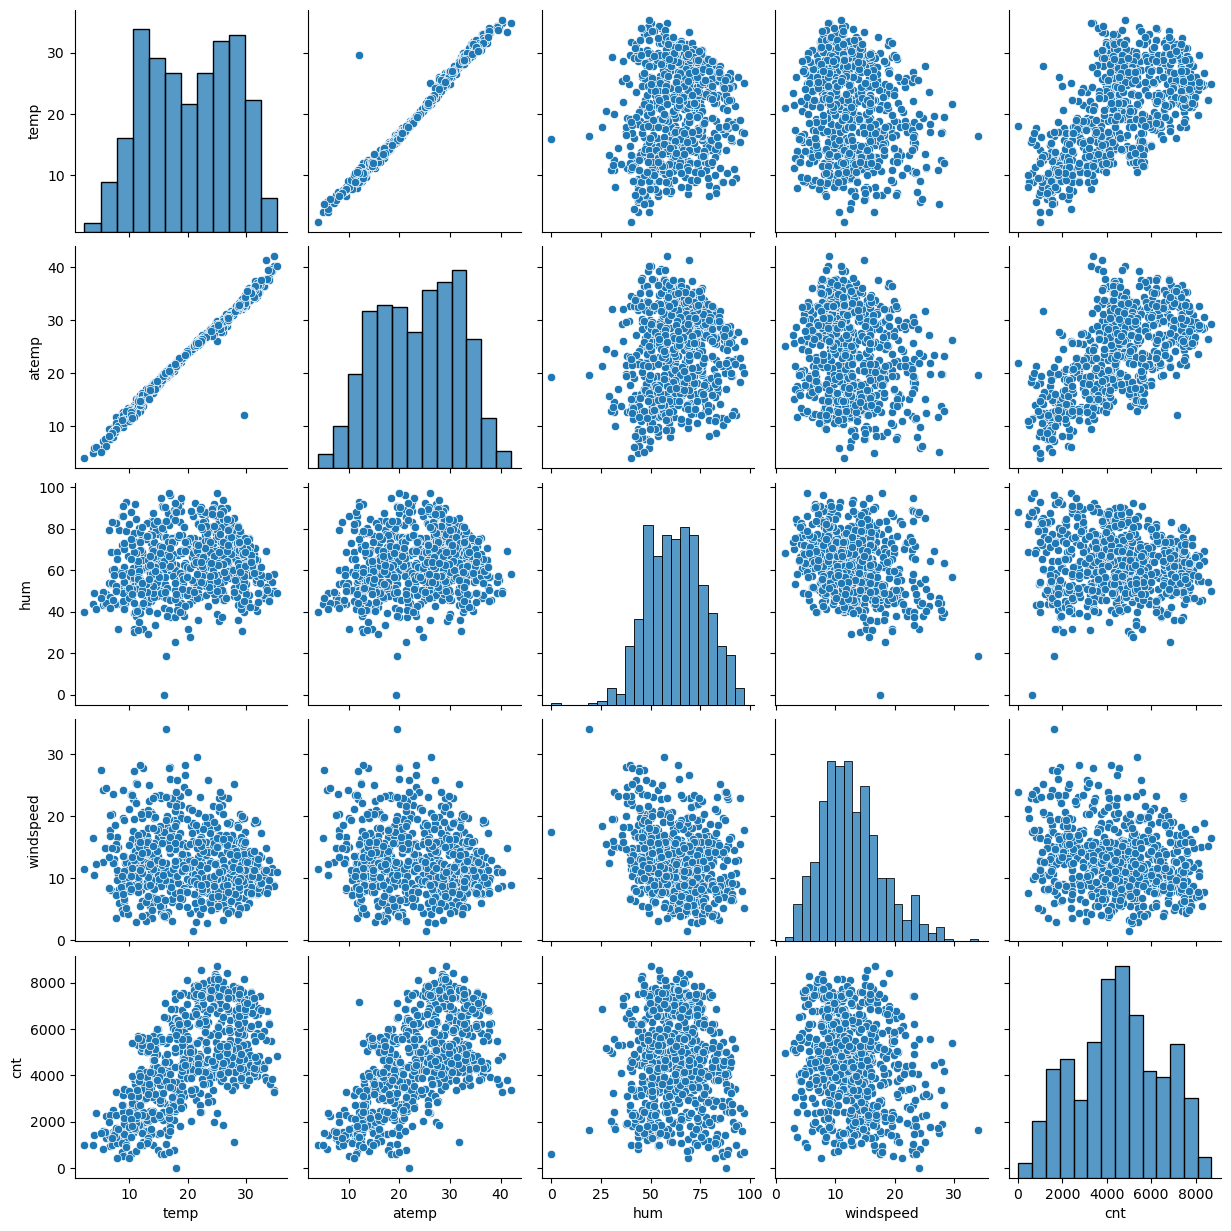

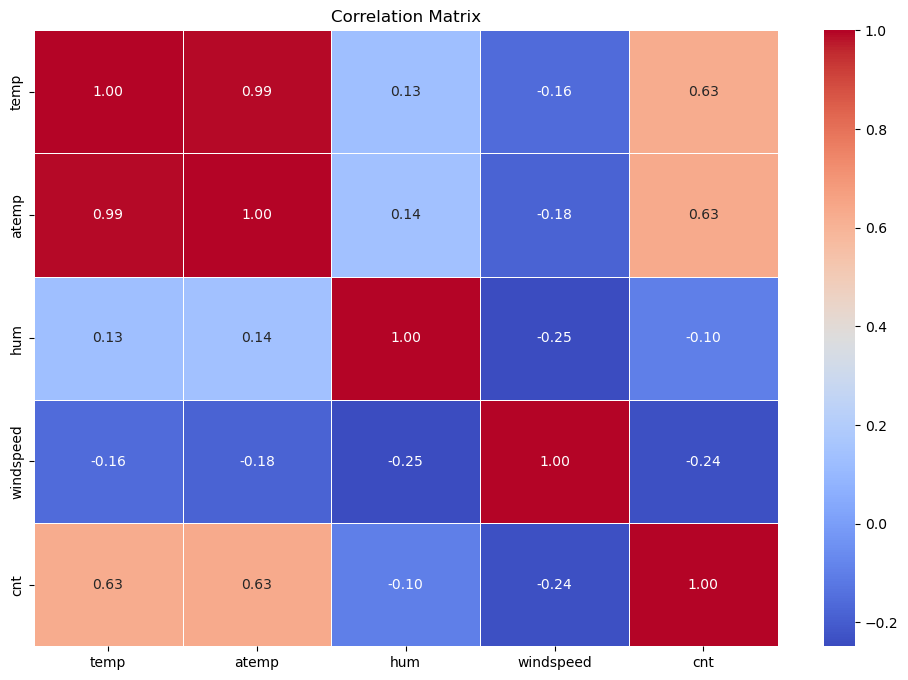

Shape of X_train: (511, 33)
Shape of y_train: (511,)
Shape of X_test: (219, 33)
Shape of y_test: (219,)
R-squared score on test set: 0.8387714141458165


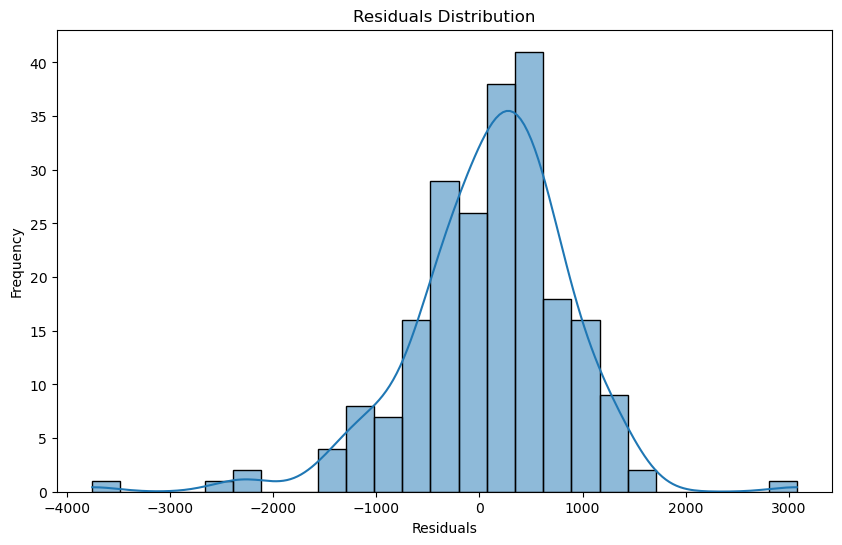

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\Priyanka\Downloads\day.csv")

# Data Preprocessing
# Convert categorical variables to appropriate data types
data['season'] = data['season'].astype(str)
data['yr'] = data['yr'].astype(str)
data['mnth'] = data['mnth'].astype(str)
data['holiday'] = data['holiday'].astype(str)
data['weekday'] = data['weekday'].astype(str)
data['workingday'] = data['workingday'].astype(str)
data['weathersit'] = data['weathersit'].astype(str)

# Convert the date column to datetime format
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')

# Create new columns for day, month, and year
data['day'] = data['dteday'].dt.day
data['month'] = data['dteday'].dt.month
data['year'] = data['dteday'].dt.year

# Now you can drop the original date column
data.drop(['dteday'], axis=1, inplace=True)

# Drop 'casual' and 'registered' columns
data.drop(['casual', 'registered'], axis=1, inplace=True)

# Mapping for season
season_map = {'1': 'Spring', '2': 'Summer', '3': 'Fall', '4': 'Winter'}
data['season'] = data['season'].map(season_map)

# Mapping for yr
yr_map = {'0': '2018', '1': '2019'}
data['yr'] = data['yr'].map(yr_map)

# Mapping for mnth
mnth_map = {'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5': 'May', '6': 'June', '7': 'July', '8': 'August', '9': 'September', '10': 'October', '11': 'November', '12': 'December'}
data['mnth'] = data['mnth'].map(mnth_map)

# Mapping for holiday
holiday_map = {'0': 'No', '1': 'Yes'}
data['holiday'] = data['holiday'].map(holiday_map)

# Mapping for weekday
weekday_map = {'0': 'Sunday', '1': 'Monday', '2': 'Tuesday', '3': 'Wednesday', '4': 'Thursday', '5': 'Friday', '6': 'Saturday'}
data['weekday'] = data['weekday'].map(weekday_map)

# Mapping for workingday
workingday_map = {'0': 'No', '1': 'Yes'}
data['workingday'] = data['workingday'].map(workingday_map)

# Mapping for weathersit
weathersit_map = {'1': 'Clear, Few clouds', '2': 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', '3': 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', '4': 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
data['weathersit'] = data['weathersit'].map(weathersit_map)

# Convert 'holiday' and 'workingday' to numerical values
data['holiday'] = data['holiday'].map({'No': 0, 'Yes': 1})
data['workingday'] = data['workingday'].map({'No': 0, 'Yes': 1})

# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Summary statistics for numerical variables
print("Summary Statistics for Numerical Variables:")
print(data.describe())

# Distribution of target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True)
plt.title("Distribution of 'cnt'")
plt.xlabel("Count of Bike Rentals")
plt.ylabel("Frequency")
plt.show()

# Bivariate Analysis
# Relationship between temperature and count of bike rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title("Relationship between Temperature and Count of Bike Rentals")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Count of Bike Rentals")
plt.show()

# Relationship between weather situation and count of bike rentals
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title("Relationship between Weather Situation and Count of Bike Rentals")
plt.xlabel("Weather Situation")
plt.ylabel("Count of Bike Rentals")
plt.show()

# Box plot of rental count ('cnt') vs. season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data)
plt.title("Rental Count by Season")
plt.xlabel("Season")
plt.ylabel("Count of Bike Rentals")
plt.show()

# Box plot of rental count ('cnt') vs. month
plt.figure(figsize=(10, 6))
sns.boxplot(x='mnth', y='cnt', data=data)
plt.title("Rental Count by Month")
plt.xlabel("Month")
plt.ylabel("Count of Bike Rentals")
plt.show()

# Box plot of rental count ('cnt') vs. weekday
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=data)
plt.title("Rental Count by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count of Bike Rentals")
plt.show()

# Box plot of rental count ('cnt') vs. weather situation
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title("Rental Count by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Count of Bike Rentals")
plt.show()

# Multivariate Analysis
# Pairplot of numerical variables
numeric_vars = data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(numeric_vars)
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_vars.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Create dummy variables for categorical variables with more than 2 categories
data = pd.get_dummies(data, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

# Splitting the dataset into train and test sets (70:30 ratio)
X = data.drop('cnt', axis=1)  # Features
y = data['cnt']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Printing the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Get the list of numeric columns
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Column Transformer to apply scaling only to numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # Pass through non-numeric columns unchanged
)

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_scaled = preprocessor.transform(X_test)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Initialize the linear regression model
lr = LinearRegression()

# Initialize RFE
rfe = RFE(lr, n_features_to_select=10)  # Here, we are selecting top 10 features. You can change this number based on your requirement.

# Fit RFE on the training data
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Transform the test data
X_test_rfe = rfe.transform(X_test_scaled)

# Fit the linear regression model on the selected features
lr.fit(X_train_rfe, y_train)

# Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set:", r2)

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()